In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
df = pd.read_csv("updated_df.csv")

In [11]:
defense = pd.read_csv('defense.csv')
common_columns = ['Player', 'Nation', 'Pos', 'Squad', 'Matches']
df = pd.merge(
    df,
    defense,
    on=common_columns,
    how='left', 
    suffixes=('', 'defense') 
)
df.fillna(0, inplace=True)

In [13]:
print([repr(col) for col in df.columns])

["'Player'", "'Nation'", "'Pos'", "'Squad'", "'Comp'", "'Age'", "'Born'", "'MP'", "'Starts'", "'Min'", "'90s'", "'Goals'", "'Assists'", "'G+A'", "'G-PK'", "'PK'", "'PK_Attempted'", "'Yellow'", "'Red'", "'xG'", "'npxG'", "'xAG'", "'npxG+xAG'", "'Prg_Carries'", "'Prg_Passes'", "'Prg_Passes_Received'", "'Goals_per90'", "'Assists_per90'", "'G+A_per90'", "'G-PK_per90'", "'G+A-PK_per90'", "'xG_per90'", "'xAG_per90'", "'xG+xAG_per90'", "'npxG_per90'", "'npxG+xAG_per90'", "'Matches'", "'Unnamed: 0'", "'Position'", "'Competition'", "'Age_shooting'", "'Born_shooting'", "'90s_shooting'", "'Shots_total'", "'Shots_on_target'", "'Shots_on_target_%'", "'Shots_total_per90'", "'Shots_on_target_per90'", "'Goals_per_shot'", "'Goals_per_shot_on_target'", "'Average_shot_distance'", "'Shots_free_kicks'", "'XG'", "'Npxg'", "'Npxg_per_shot'", "'Xg_net'", "'Npxg_net'", "'Unnamed: 0_passing'", "'Pos_passing'", "'Comp_passing'", "'Age_passing'", "'Born_passing'", "'90s_passing'", "'Passes_Total_Cmp'", "'Passes_T

In [17]:
df.to_csv('playerdatabase.csv', index=False)

In [23]:
df['Min'] = df['Min'].str.replace(',', '').astype(float)
print(df['Min'].dtype)

float64


In [25]:
df['Min'] = df['Min'].replace(0, pd.NA)

columns_to_convert = [
    'Progressive_Passes_Received', 'Interceptionsdefense', 'Passes_Blockeddefense', 'Tackles_Won',
    'Crosses', 'Switches', 'Through_Balls', 'Progressive_Passes', 'Key_Passes',
    'Clearances', 'Blocks', 'Dribblers_Tackled', 'Tackles_Def_3rd', 'Tackles_Mid_3rd', 'Tackles_Att_3rd',
    'Tackles_Wondefense', 'Aerials_Won', 'Ball_Recoveries', 'Progressive_Carries', 'Touches',
    'Passes_1/3', 'Passes_Penalty_Area', 'Crosses_Penalty_Area']

for col in columns_to_convert:
    df[col + '_per90'] = (df[col] / df['Min']) * 90  
    df.drop(columns=[col], inplace=True)           

df.fillna(0, inplace=True)

In [27]:
print([repr(col) for col in df.columns])

["'Player'", "'Nation'", "'Pos'", "'Squad'", "'Comp'", "'Age'", "'Born'", "'MP'", "'Starts'", "'Min'", "'90s'", "'Goals'", "'Assists'", "'G+A'", "'G-PK'", "'PK'", "'PK_Attempted'", "'Yellow'", "'Red'", "'xG'", "'npxG'", "'xAG'", "'npxG+xAG'", "'Prg_Carries'", "'Prg_Passes'", "'Prg_Passes_Received'", "'Goals_per90'", "'Assists_per90'", "'G+A_per90'", "'G-PK_per90'", "'G+A-PK_per90'", "'xG_per90'", "'xAG_per90'", "'xG+xAG_per90'", "'npxG_per90'", "'npxG+xAG_per90'", "'Matches'", "'Unnamed: 0'", "'Position'", "'Competition'", "'Age_shooting'", "'Born_shooting'", "'90s_shooting'", "'Shots_total'", "'Shots_on_target'", "'Shots_on_target_%'", "'Shots_total_per90'", "'Shots_on_target_per90'", "'Goals_per_shot'", "'Goals_per_shot_on_target'", "'Average_shot_distance'", "'Shots_free_kicks'", "'XG'", "'Npxg'", "'Npxg_per_shot'", "'Xg_net'", "'Npxg_net'", "'Unnamed: 0_passing'", "'Pos_passing'", "'Comp_passing'", "'Age_passing'", "'Born_passing'", "'90s_passing'", "'Passes_Total_Cmp'", "'Passes_T

In [87]:
#renaming columns, run everything again after this
df = df.rename(columns={'Passes_Blockeddefense_per90': 'Passes_Blocked_per90'})


In [89]:
DEFENDERS = df[df['Pos'] == 'DF']
MIDFIELDERS = df[df['Pos'] == 'MF']
FORWARDS = df[df['Pos'] == 'FW']

In [91]:
params=['Goals', 'Assists','Goals_per90', 'Assists_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xAG_per90', 
        'xG+xAG_per90', 'npxG_per90', 'npxG+xAG_per90','Shots_total_per90', 'Shots_on_target_per90','Take_Ons_Attempted',
        '1/3_Carries','Carries_Penalty_Area','Shot_Creating_Action_per90','Goal_Creating_Action_90','Plus/Minus_per_90',
        'xG_Plus/Minus_per_90','Fouls_Drawn', 'Offsides','Percentage_of_Aerials_Won','Dribblers_Tackle_W%',
        'Progressive_Passes_Received_per90', 'Interceptions_per90', 'Passes_Blocked_per90', 'Tackles_Won_per90', 
        'Crosses_per90', 'Switches_per90', 'Through_Balls_per90', 'Progressive_Passes_per90', 
        'Key_Passes_per90', 'Clearances_per90', 'Blocks_per90', 'Dribblers_Tackled_per90', 'Tackles_Def_3rd_per90', 
        'Tackles_Mid_3rd_per90', 'Tackles_Att_3rd_per90', 'Tackles_Won_per90', 'Aerials_Won_per90', 
        'Ball_Recoveries_per90', 'Progressive_Carries_per90', 'Touches_per90', 'Passes_1/3_per90', 
        'Passes_Penalty_Area_per90', 'Crosses_Penalty_Area_per90']

In [93]:
# Calculate percentile ranks for the players in the larger DataFrame
defender_ranks = DEFENDERS[params].rank(pct=True) * 100
midfielder_ranks = MIDFIELDERS[params].rank(pct=True) * 100
forwards_ranks = FORWARDS[params].rank(pct=True) * 100

In [95]:
defender_ranks = defender_ranks.round(0)
midfielder_ranks = midfielder_ranks.round(0)
forwards_ranks = forwards_ranks.round(0)

In [123]:
robinson = defender_ranks.loc[1969]

In [127]:
# Extract the percentile ranks, transpose, and sort them in descending order
robinson_sorted = robinson.T.sort_values(ascending=False)
robinson_sorted

Assists                              100.0
Carries_Penalty_Area                 100.0
Take_Ons_Attempted                    99.0
Assists_per90                         99.0
Passes_Penalty_Area_per90             98.0
Offsides                              98.0
1/3_Carries                           98.0
Progressive_Passes_Received_per90     97.0
Crosses_Penalty_Area_per90            97.0
G+A_per90                             97.0
G+A-PK_per90                          97.0
Progressive_Carries_per90             96.0
Goal_Creating_Action_90               96.0
Crosses_per90                         94.0
Key_Passes_per90                      94.0
Shot_Creating_Action_per90            93.0
Interceptions_per90                   91.0
xAG_per90                             91.0
Fouls_Drawn                           90.0
Tackles_Def_3rd_per90                 89.0
npxG+xAG_per90                        85.0
Passes_Blocked_per90                  85.0
xG+xAG_per90                          85.0
Tackles_Won

In [129]:
# Get the top 20 parameters
top_30_params = robinson_sorted.index[:30]
top_30_params_values = robinson_sorted.head(30)

# Display the top 20 parameters and their values
print("Top 30 Parameters:")
print(top_30_params)
print("Values:")
print(top_30_params_values)

Top 30 Parameters:
Index(['Assists', 'Carries_Penalty_Area', 'Take_Ons_Attempted',
       'Assists_per90', 'Passes_Penalty_Area_per90', 'Offsides', '1/3_Carries',
       'Progressive_Passes_Received_per90', 'Crosses_Penalty_Area_per90',
       'G+A_per90', 'G+A-PK_per90', 'Progressive_Carries_per90',
       'Goal_Creating_Action_90', 'Crosses_per90', 'Key_Passes_per90',
       'Shot_Creating_Action_per90', 'Interceptions_per90', 'xAG_per90',
       'Fouls_Drawn', 'Tackles_Def_3rd_per90', 'npxG+xAG_per90',
       'Passes_Blocked_per90', 'xG+xAG_per90', 'Tackles_Won_per90',
       'Tackles_Won_per90', 'Tackles_Won_per90', 'Tackles_Won_per90',
       'Tackles_Mid_3rd_per90', 'Dribblers_Tackled_per90', 'Touches_per90'],
      dtype='object')
Values:
Assists                              100.0
Carries_Penalty_Area                 100.0
Take_Ons_Attempted                    99.0
Assists_per90                         99.0
Passes_Penalty_Area_per90             98.0
Offsides                     

In [131]:
robinson_params = ['Carries_Penalty_Area', 'Assists_per90', 'Take_Ons_Attempted', '1/3_Carries',
                   'Passes_Penalty_Area_per90', 'Crosses_Penalty_Area_per90', 'Progressive_Carries_per90',
                   'Key_Passes_per90', 'Shot_Creating_Action_per90', 'Interceptions_per90',
                   'Tackles_Won_per90', 'Touches_per90', 'Dribblers_Tackled_per90', 'Ball_Recoveries_per90', 'Blocks_per90']

split_params = [robinson_params.replace('_', '\n') for robinson_params in robinson_params]

In [133]:
split_params

['Carries\nPenalty\nArea',
 'Assists\nper90',
 'Take\nOns\nAttempted',
 '1/3\nCarries',
 'Passes\nPenalty\nArea\nper90',
 'Crosses\nPenalty\nArea\nper90',
 'Progressive\nCarries\nper90',
 'Key\nPasses\nper90',
 'Shot\nCreating\nAction\nper90',
 'Interceptions\nper90',
 'Tackles\nWon\nper90',
 'Touches\nper90',
 'Dribblers\nTackled\nper90',
 'Ball\nRecoveries\nper90',
 'Blocks\nper90']

In [135]:
robinsonrankslist = robinson[['Carries_Penalty_Area', 'Assists_per90', 'Take_Ons_Attempted', '1/3_Carries',
                   'Passes_Penalty_Area_per90', 'Crosses_Penalty_Area_per90', 'Progressive_Carries_per90',
                   'Key_Passes_per90', 'Shot_Creating_Action_per90', 'Interceptions_per90',
                   'Tackles_Won_per90', 'Touches_per90', 'Dribblers_Tackled_per90', 'Ball_Recoveries_per90', 'Blocks_per90']]

In [141]:
robinsonrankslist

Carries_Penalty_Area          100.0
Assists_per90                  99.0
Take_Ons_Attempted             99.0
1/3_Carries                    98.0
Passes_Penalty_Area_per90      98.0
Crosses_Penalty_Area_per90     97.0
Progressive_Carries_per90      96.0
Key_Passes_per90               94.0
Shot_Creating_Action_per90     93.0
Interceptions_per90            91.0
Tackles_Won_per90              84.0
Tackles_Won_per90              84.0
Tackles_Won_per90              84.0
Tackles_Won_per90              84.0
Touches_per90                  72.0
Dribblers_Tackled_per90        78.0
Ball_Recoveries_per90          66.0
Blocks_per90                   56.0
Name: 1969, dtype: float64

In [143]:
robinsonrankslist = robinsonrankslist[~robinsonrankslist.index.duplicated(keep='first')]

In [145]:
ARlist = robinsonrankslist.values.flatten().tolist()

ARlist

[100.0,
 99.0,
 99.0,
 98.0,
 98.0,
 97.0,
 96.0,
 94.0,
 93.0,
 91.0,
 84.0,
 72.0,
 78.0,
 66.0,
 56.0]

In [147]:
print(robinsonrankslist.shape)

(15,)


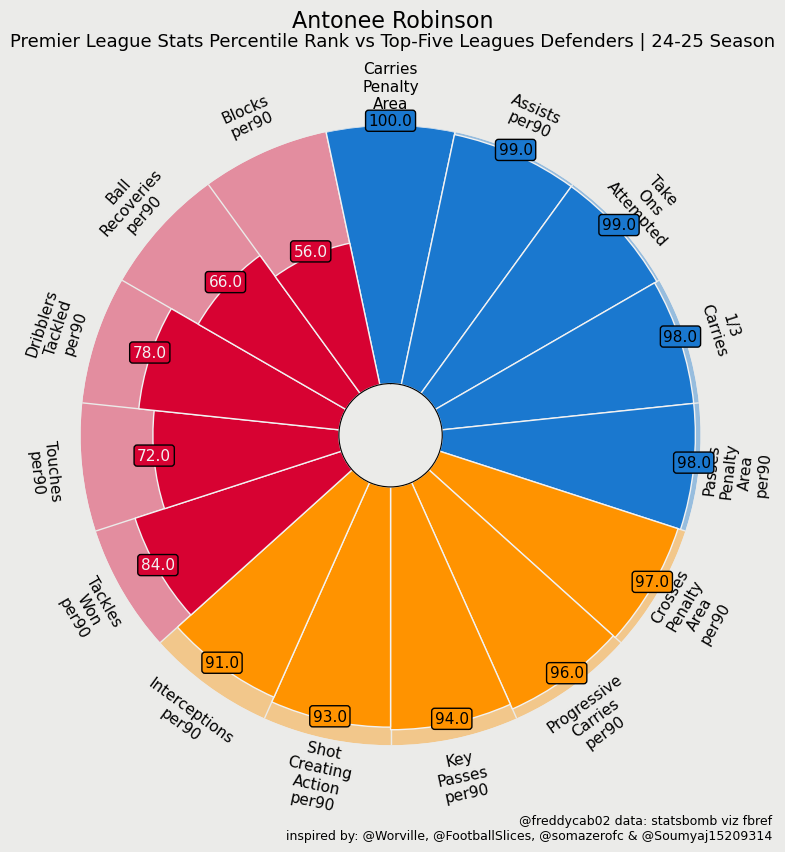

In [151]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    ARlist,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Antonee Robinson", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Defenders | 24-25 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@freddycab02 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)

plt.savefig('Robinson_Percentile.png', dpi=500, bbox_inches='tight')  
plt.show()

In [ ]:
#get photos and rename original database